In [295]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.2f}'.format
import requests
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore')

In [296]:
data=pd.read_csv("insuranceClaim.csv",delimiter=',',encoding='latin1')
data.head()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim,DateClaim
0,19,0,27.90,3009.00,0,1,3,1.688.49,1,12/12/2019
1,18,1,33.77,3008.00,1,0,2,1.725.55,1,12/12/2019
2,28,1,33.00,3009.00,3,0,2,"4,449,462",0,12/12/2019
3,33,1,22.70,10009.00,0,0,1,21984.47061,0,12/12/2019
4,32,1,28.88,8010.00,0,0,1,3866.8552,1,12/12/2019


# Quick cleaning of the Dataset

all the steps were performed on the project 1 with explanation 

In [179]:
# from data.info() we can notice that charge is defined as object because it is considered as String in csv file because 
#the proesence of ","in the numbers 
data['charges'] = data['charges'].str.replace(',', '')
# after eliminating "," from charge feature,now we proceed to change the String to the FLoat errors='coerce'
data['charges'] = pd.to_numeric(data['charges'],errors ='coerce')

In [180]:
data.head()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim,DateClaim
0,19,0,27.90,3009.00,0,1,3,nan,1,12/12/2019
1,18,1,33.77,3008.00,1,0,2,nan,1,12/12/2019
2,28,1,33.00,3009.00,3,0,2,4449462.00,0,12/12/2019
3,33,1,22.70,10009.00,0,0,1,21984.47,0,12/12/2019
4,32,1,28.88,8010.00,0,0,1,3866.86,1,12/12/2019


In [181]:
#we notice that our target has an outlier we should process to drop ir but since this outliers is the max value
#we should find out where is located this value 
np.argmax(data['charges'])
# we will drop row # 2 as it is outlier


2

In [182]:
data.drop([2], inplace=True)

In [183]:
np.mean(data['charges'])

13229.343332700526

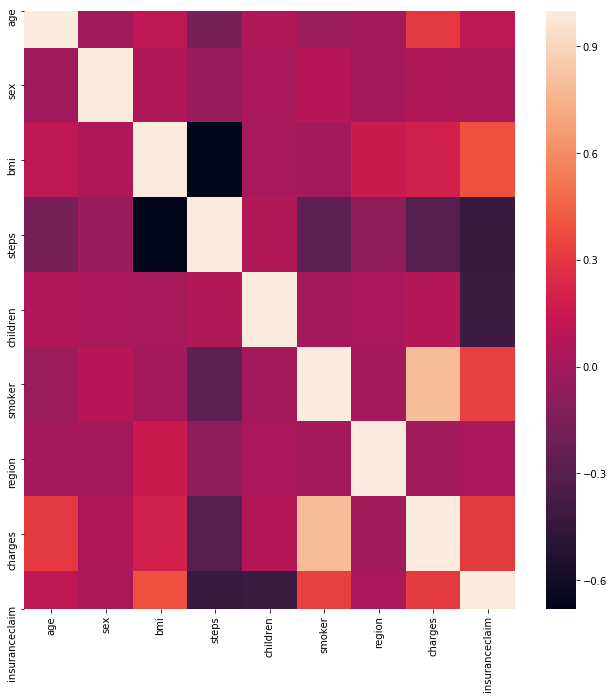

In [184]:
#corr_matrix["charges"].sort_values(ascending=False)
def corr_vis(df):
    corr_matrix = df.corr()
    fig, ax = plt.subplots()
    fig.set_size_inches(11,11)
    sns.heatmap(corr_matrix)
corr_vis(data)

In [185]:
 #import numpy as np
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy="median")
data_num = data.drop(['region','DateClaim'], axis=1)
X = imputer.fit_transform(data_num)

In [186]:
data_tr1 = pd.DataFrame(X,columns=['age', 'sex',    'bmi',   'steps',  'children', 'smoker', 'charges' ,'insuranceclaim' ])
#print(data_tr1.head())

In [187]:
data_tr1.head()

,age,sex,bmi,steps,children,smoker,charges,insuranceclaim
0,19.00,0.00,27.90,3009.00,0.00,1.00,9377.90,1.00
1,18.00,1.00,33.77,3008.00,1.00,0.00,9377.90,1.00
2,33.00,1.00,22.70,10009.00,0.00,0.00,21984.47,0.00
3,32.00,1.00,28.88,8010.00,0.00,0.00,3866.86,1.00
4,31.00,0.00,25.74,8005.00,0.00,0.00,3756.62,0.00


In [189]:
#we need to change region name to a number 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_cat = data["region"]
data_cat_encoded = le.fit_transform(data_cat)
data_cat_encoded

array([3, 2, 1, ..., 2, 3, 1], dtype=int64)

In [190]:
data_tr2 = pd.DataFrame(data_cat_encoded,columns=['region'] )

In [191]:
data_prepared=pd.concat([ data_tr1,data_tr2],axis=1)
data_prepared1=data_prepared
data_prepared=data_prepared1
#print (data_prepared)

In [192]:
# we need to check our target and which one of its transformations is the most accurate 
data_prepared["charges_log"] = np.log(data_prepared["charges"])
data_prepared["Steps_log"] = np.log(data_prepared["steps"])
#print (data_prepared)

In [193]:
data_prepared.corr()

,age,sex,bmi,steps,children,smoker,charges,insuranceclaim,region,charges_log,Steps_log
age,1.00,-0.02,0.11,-0.17,0.04,-0.03,0.30,0.11,0.00,0.53,-0.13
sex,-0.02,1.00,0.05,-0.04,0.02,0.08,0.05,0.03,0.00,0.00,-0.05
bmi,0.11,0.05,1.00,-0.68,0.01,0.00,0.19,0.38,0.16,0.13,-0.67
steps,-0.17,-0.04,-0.68,1.00,0.06,-0.27,-0.30,-0.42,-0.07,-0.31,0.99
children,0.04,0.02,0.01,0.06,1.00,0.01,0.07,-0.41,0.02,0.16,0.05
smoker,-0.03,0.08,0.00,-0.27,0.01,1.00,0.78,0.33,-0.00,0.66,-0.27
charges,0.30,0.05,0.19,-0.30,0.07,0.78,1.00,0.31,-0.01,0.89,-0.29
insuranceclaim,0.11,0.03,0.38,-0.42,-0.41,0.33,0.31,1.00,0.02,0.23,-0.41
region,0.00,0.00,0.16,-0.07,0.02,-0.00,-0.01,0.02,1.00,-0.04,-0.07
charges_log,0.53,0.00,0.13,-0.31,0.16,0.66,0.89,0.23,-0.04,1.00,-0.29


In [198]:
print (np.max(data_prepared['charges']))
print(np.mean(data_prepared['charges']))
print(np.std(data_prepared['charges']))

63770.42801
13206.298075362003
12021.574231315337


In [204]:
# since my Y is regression I changed to classification by putting the Y <= 12021.60 is the class 0 
#and Y>12021.60 is the Class 1
data_prepared['Classes'] = np.where(data_prepared['charges']<=12021.574231315337, 0, 1)
data_prepared

,age,sex,bmi,steps,children,smoker,charges,insuranceclaim,region,charges_log,Steps_log,Classes
0,19.00,0.00,27.90,3009.00,0.00,1.00,9377.90,1.00,3,9.15,8.01,0
1,18.00,1.00,33.77,3008.00,1.00,0.00,9377.90,1.00,2,9.15,8.01,0
2,33.00,1.00,22.70,10009.00,0.00,0.00,21984.47,0.00,1,10.00,9.21,1
3,32.00,1.00,28.88,8010.00,0.00,0.00,3866.86,1.00,1,8.26,8.99,0
4,31.00,0.00,25.74,8005.00,0.00,0.00,3756.62,0.00,2,8.23,8.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1332,50.00,1.00,30.97,4008.00,3.00,0.00,10600.55,0.00,1,9.27,8.30,0
1333,18.00,0.00,31.92,3003.00,0.00,0.00,2205.98,1.00,0,7.70,8.01,0
1334,18.00,0.00,36.85,3008.00,0.00,0.00,1629.83,1.00,2,7.40,8.01,0
1335,21.00,0.00,25.80,8009.00,0.00,0.00,2007.94,0.00,3,7.60,8.99,0


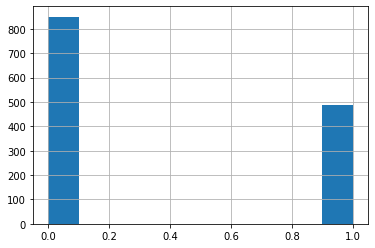

In [199]:
data_prepared1['Classes'].hist()

##### From the Project 2  Random Forest expressed the best performance  with Accuracy on training set: 0.98 and Accuracy on test set: 0.884 

### Step 3: Apply 3-types of clustering on your data and visualize the output of each both with and without PCA run on it first. Calculate both ARI and Silhouette Coefficient for all six of the combinations.¶
- k-Means (use an elbow visualization to determine the optimal numbers of clusters)
- Aggolmerate/Hierarchical
- DBSCAN

### preparing the data

In [391]:
from sklearn.model_selection import train_test_split
X1=data_prepared[['age' , 'bmi' ,'Steps_log',  'children',  'smoker',  'insuranceclaim','region']]
y1=data_prepared1['Classes']

in order,to well perfom clustering the Dataset is transformed to  numpy array 

In [347]:
X=X1.to_numpy()
y=y1.to_numpy()

spliting the data on train set and test set 

In [348]:
#HELOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print (X_train.shape)
print  ( y_train.shape)
print (X_test.shape)
print ( y_test.shape)

(1069, 7)
(1069,)
(268, 7)
(268,)


# PCA On the Unscaled data

The function below allows to do calculation of the number of componement  needed in order to get a specific total variance

In [212]:
def PCA_varriance(df,ExVar):
    from sklearn.decomposition import PCA 
    pca=PCA(ExVar)
    comp=pca.fit_transform(df)
    vari=round(pca.explained_variance_ratio_.sum(),2)
    print('{:20.25}'.format('numberFeatures'),'{:20.25}'.format('Explain variace'))
    print('{:20.25}'.format(str(pca.n_components_)),'{:20.25}'.format(str(vari)))

In [213]:
PCA_varriance(X_train,0.95)

numberFeatures       Explain variace     
2                    0.99                


let's try to plot the number of componement and  with the variance 

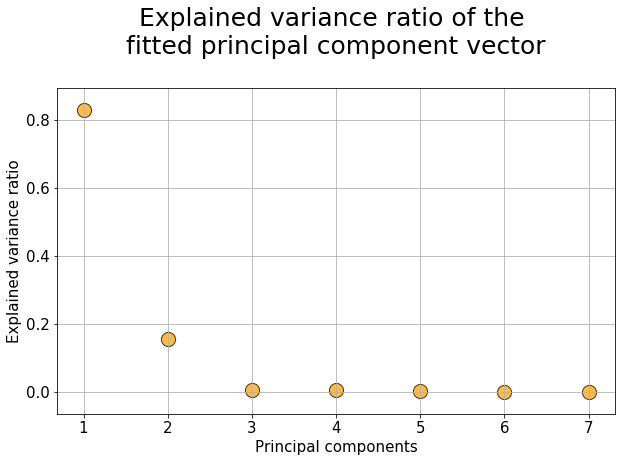

In [214]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mglearn
import warnings

from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca1 = PCA(n_components=None)
pca1=pca1.fit(X_train)
# transform data onto the first two principal components
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(pca1.explained_variance_ratio_))],
            y=pca1.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(pca1.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()


In [166]:
print (pca1.explained_variance_)
print (pca1.explained_variance_ratio_)
print (pca1.explained_variance_ratio_.cumsum())
pca1.explained_variance_ratio_

[1.97855524e+02 3.54778919e+01 1.47184951e+00 1.21075747e+00
 2.48938762e-01 1.01360829e-01 7.58547556e-02]
[8.36803003e-01 1.50048914e-01 6.22498715e-03 5.12073389e-03
 1.05285261e-03 4.28691827e-04 3.20817362e-04]
[0.836803   0.98685192 0.9930769  0.99819764 0.99925049 0.99967918
 1.        ]


array([8.36803003e-01, 1.50048914e-01, 6.22498715e-03, 5.12073389e-03,
       1.05285261e-03, 4.28691827e-04, 3.20817362e-04])

 The above plot  and the the function means that the $1^{st}$ principal component explains about 83% of the total variance in the data and the $2^{nd}$ component explians further 18%. Therefore, if we just consider first two components, they together explain 98% of the total variance.


#  Fitting PCA on the no scaled X_train  with n_components=2

Text(0, 0.5, 'Second principal component')

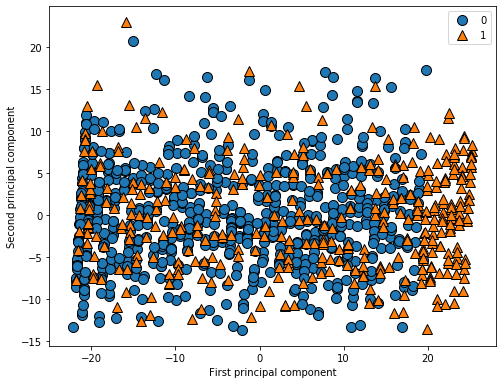

In [219]:
# transform data onto the first two principal components
#X_pca1 = pca1.transform(cancer.data)
pca1 = PCA(n_components=2)
# fit PCA model to data
pca1=pca1.fit(X_train)
X_pca1 = pca1.transform(X_train)
# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
#mglearn.discrete_scatter(X_pca1[:, 0], X_pca1[:, 1], cancer.target)
mglearn.discrete_scatter(X_pca1[:, 0], X_pca1[:, 1], y_train)
#plt.legend(cancer.target, loc="best")
plt.legend(loc="best") # I have to put Y name 
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

From the plot above we can see how Badly PCA separates the feature space into visible clusters already for 2 components. 

Text(0, 0.5, 'Principal components')

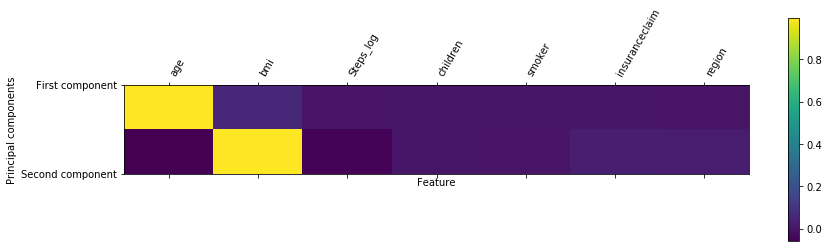

In [169]:
plt.matshow(pca1.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(X1.columns.values)),
           X1.columns.values, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

From the Plot above we notice a constant color exists over the whole plot grid. In this case, this is caused by improper scaling which explains that sacling  is mandatory 

# PCA on the Scaled Data

In [220]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_scaled = scaler.transform(X_train)

In [221]:
PCA_varriance(X_scaled,0.95)

numberFeatures       Explain variace     
6                    0.97                


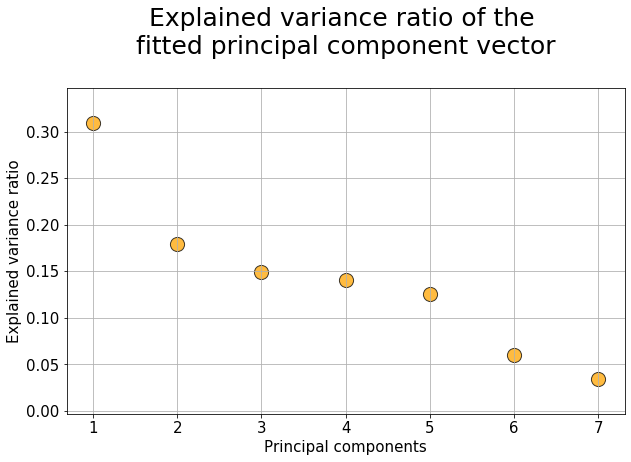

In [222]:
from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca2 = PCA(n_components=None)
# fit PCA model to data
pca2.fit(X_scaled)
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(pca2.explained_variance_ratio_))],
            y=pca2.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(pca2.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()


In [223]:
print(pca2.explained_variance_ratio_)
print(pca2.explained_variance_ratio_.cumsum())

[0.30965059 0.17940193 0.149511   0.14049807 0.12603344 0.06031226
 0.0345927 ]
[0.30965059 0.48905253 0.63856353 0.7790616  0.90509504 0.9654073
 1.        ]


The above plot means that the 6  principal component explains about 96% of the total variance. Therefore, so we  have to  consider first six components, they together explain 96% of the total variance.


# Random Forest VS PCA

# PCA on scaled data  with n_components=6

Text(0, 0.5, 'Second principal component')

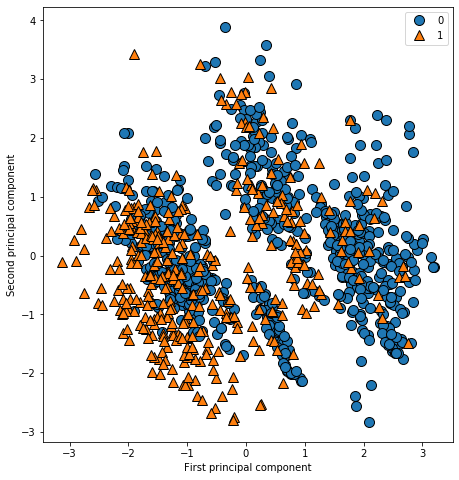

In [285]:
from sklearn.decomposition import PCA
pca2 = PCA(n_components=6)
pca2.fit(X_scaled)
X_pca2 = pca2.transform(X_scaled)
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca2[:, 0], X_pca2[:, 1], y_train)

plt.legend(loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")


From the plot above we can notice that PCA on the scaled data with 6 components  improves a bit  the separation of  the features space into visible clusters compares to the unscaled data 

Text(0, 0.5, 'Principal components')

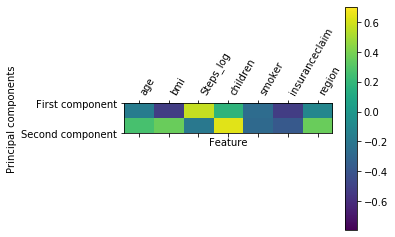

In [286]:
plt.matshow(pca2.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(X1.columns.values)),
           X1.columns.values, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

From the Plot above we notice a different color exists over the whole plot grid. In this case, this scaling  is properly done 

From project 2# Random forest performed the best with an Accuracy of **0.98** on training set and an Accuracy of **0.884**on the test. Since the dataset is very small only one feature was dropped by PCA  As  we can see PCA did not improve the accurancy of the Random Forest model.

pca2.transform(X_scaled)


In [333]:
scaler = StandardScaler()
scaler.fit(X_train)
X_scaled = scaler.transform(X_train)


# APPLY KMEAN WITH PCA

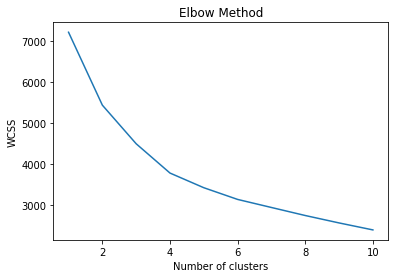

In [350]:
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.cluster import KMeans
#we fit Kmeans using the transformed data from PCA
wcss = []
for i in range(1, 11):
    kmeans_pca = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans_pca.fit(X_pca2)
    wcss.append(kmeans_pca.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

 we’ll categorize the data using the optimum number of clusters (4) we determined in the last step. k-means++ ensures that you get don’t fall into the random initialization trap

In [373]:
kmeans_pca = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_pca.fit(X_pca2)
centers = np.array(kmeans_pca.cluster_centers_)

Text(0, 0.5, 'Feature 1')

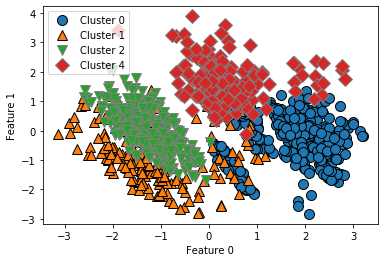

In [374]:
assignments=kmeans_pca.labels_

mglearn.discrete_scatter(X_pca2[:, 0], X_pca2[:, 1], assignments)
plt.legend(["Cluster 0", "Cluster 1","Cluster 2","Cluster 4"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


From the  Graph above, it looks like kmeans  with PCA couldn’t figure out the clusters correctly since they are not  well seprates.

# Apply kmeans without a PCA

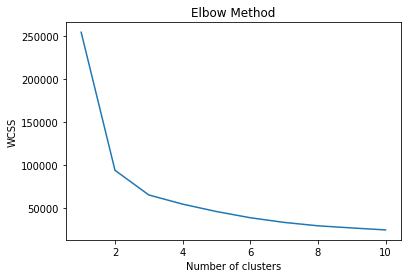

In [375]:
wcss = []
for i in range(1, 11):
    kmeans= KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


##### we’ll categorize the data using the optimum number of clusters (4) we determined in the last step. k-means++ ensures that you get don’t fall into the random initialization trap

In [376]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X_train)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

Text(0, 0.5, 'Feature 1')

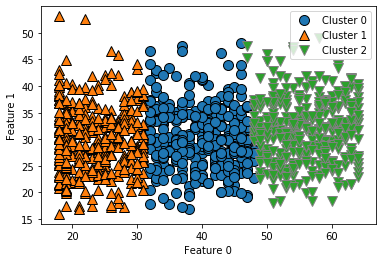

In [377]:
#centers = np.array(kmeans_pca.cluster_centers_)
assignments=kmeans.labels_
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], assignments)
plt.legend(["Cluster 0", "Cluster 1","Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


From the  Graph above, we can say that kmeans without PCA performed better.

# AgglomerativeClustering with PCA

I tried manuallay to change number of cluster from  5 to 2 and i found out the cluster=2 is the one which performs good 

Text(0, 0.5, 'Feature 1')

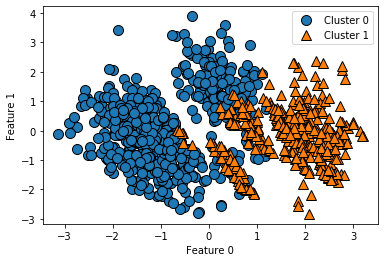

In [314]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=2)
assignment

assignment= agg.fit_predict(X_pca2)

mglearn.discrete_scatter(X_pca2[:, 0], X_pca2[:, 1], assignment)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Cluster distance')

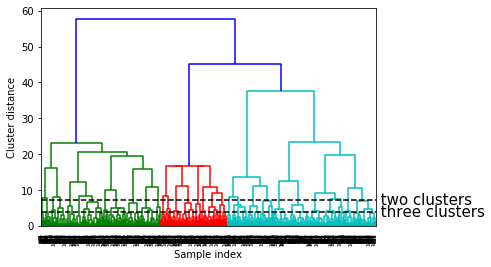

In [315]:
# Import the dendrogram function and the ward clustering function from SciPy
from scipy.cluster.hierarchy import dendrogram, ward
linkage_array = ward(X_pca2)
dendrogram(linkage_array)
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' three clusters', va='center', fontdict={'size': 15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

The key to interpreting a dendrogram is to focus on the height at which any two objects are joined together. 
so we can say thay there is a very big difference between the bleu sky and the green which explain why the cluster 0 is more present than the cluter 1

# AgglomerativeClustering without PCA


Text(0, 0.5, 'Feature 1')

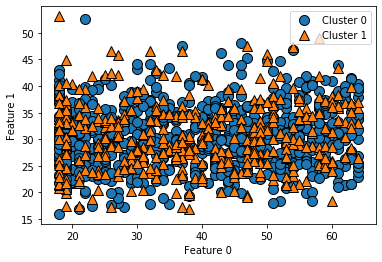

In [380]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=2)
assignment1 = agg.fit_predict(X_train)

mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], assignment)
plt.legend(["Cluster 0", "Cluster 1"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

 From the graph abaove we can say that AgglomerativeClustering without PCA performs  badly compares to the one with PCA on this Dataset

Text(0, 0.5, 'Cluster distance')

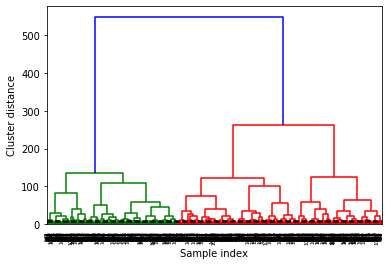

In [381]:
# Import the dendrogram function and the ward clustering function from SciPy
from scipy.cluster.hierarchy import dendrogram, ward
linkage_array = ward(X_train)
# between clusters
dendrogram(linkage_array)
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

#ax.text(bounds[1], 7.25, ' two clusters', va='center', fontdict={'size': 15})
#ax.text(bounds[1], 4, ' three clusters', va='center', fontdict={'size': 15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

The key to interpreting a dendrogram is to focus on the height at which any two objects are joined together. 
So in the graph above we can notice most of the height are different especially the smallest height which explains why # AgglomerativeClustering without PCA badly performs

# DBSCAN with PCA and scaled data

Text(0, 0.5, 'Feature 1')

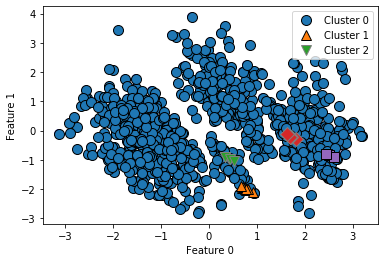

In [309]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(min_samples=5,eps=0.2)
clusters = dbscan.fit_predict(X_pca2)

# plot the cluster assignments
plt.scatter(X_pca2[:, 0], X_pca2[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

mglearn.discrete_scatter(X_pca2[:, 0], X_pca2[:, 1], clusters)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


From the graph above we can say that the DBSCAN with PCa perfoms very badly , it is not the appropriate clustering model for this data set since tDBSAN could not figure out the correct clusters for this dataset.

# DBSCAN without PCA 

I tried Manually to change the Epison "EPS" of the Dbscan 

Text(0, 0.5, 'Feature 1')

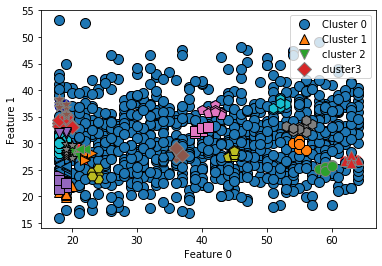

In [400]:
# from sklearn.preprocessing import StandardScaler
dbscan = DBSCAN(min_samples=5,eps=1.5)
clusters = dbscan.fit_predict(X_train)
# plot the cluster assignments
plt.scatter(X_train[:, 0], X_train[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], clusters)
plt.legend(["Cluster 0", "Cluster 1", "cluster 2", "cluster3"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


DBSAN without PCA could not figure out the correct clusters for this dataset.

# ARI without PCA

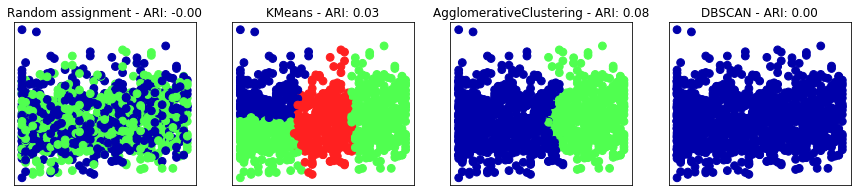

In [406]:
from sklearn.metrics.cluster import adjusted_rand_score

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})
algorithms = [KMeans(n_clusters=4), AgglomerativeClustering(n_clusters=2),
              DBSCAN()]
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X_train))
axes[0].scatter(X_train[:, 0], X_train[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(
        adjusted_rand_score(y_train, random_clusters)))
for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_train)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=clusters,
               cmap=mglearn.cm3, s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
                                           adjusted_rand_score(y_train, clusters)))


# ARI With PCA

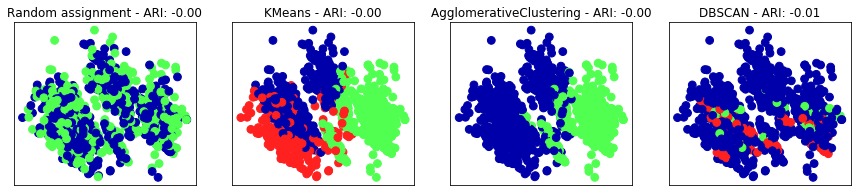

In [407]:
from sklearn.metrics.cluster import adjusted_rand_score

# Rescale the data to zero mean and unit variance
fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})
# make a list of algorithms to use
algorithms = [KMeans(n_clusters=3), AgglomerativeClustering(n_clusters=2),
              DBSCAN()]
# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X_pca2))
# plot random assignment
axes[0].scatter(X_pca2[:, 0], X_pca2[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(
        adjusted_rand_score(y_train, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # plot the cluster assignments and cluster centers
    clusters = algorithm.fit_predict(X_pca2)
    ax.scatter(X_pca2[:, 0], X_pca2[:, 1], c=clusters,
               cmap=mglearn.cm3, s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
                                           adjusted_rand_score(y_train, clusters)))


# Silhouette Without PCA

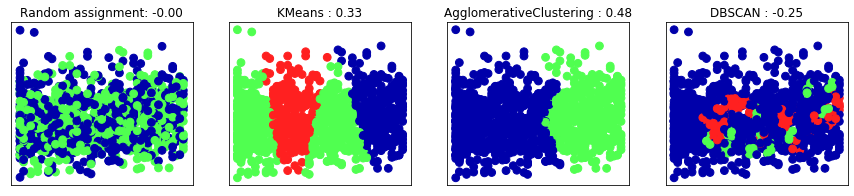

In [404]:
from sklearn.metrics.cluster import silhouette_score
fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X_train))

# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment: {:.2f}".format(
    silhouette_score(X_train, random_clusters)))

algorithms = [KMeans(n_clusters=4), AgglomerativeClustering(n_clusters=2),
              DBSCAN(eps=2)]

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_train)
    # plot the cluster assignments and cluster centers
    ax.scatter(X_train[:, 0], X_train[:, 1], c=clusters, cmap=mglearn.cm3,
               s=60)
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__,
                                      silhouette_score(X_train, clusters)))


The value of the silhouette coefficient of a segment varies between −1 and +1. A value near −1 indicates that the segment is clustered badly,A value near +1 indicates that the segment is well clustered.

# Silhouette With PCA

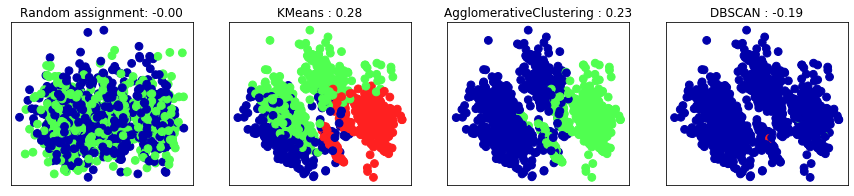

In [390]:
from sklearn.metrics.cluster import silhouette_score

# rescale the data to zero mean and unit variance
#scaler = StandardScaler()
#scaler.fit(X_train)
#X_scaled = scaler.transform(X_train)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X_pca2))

# plot random assignment
axes[0].scatter(X_pca2[:, 0], X_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment: {:.2f}".format(
    silhouette_score(X_pca2, random_clusters)))

algorithms = [KMeans(n_clusters=4), AgglomerativeClustering(n_clusters=2),
              DBSCAN(eps=0.2)]

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_pca2)
    # plot the cluster assignments and cluster centers
    ax.scatter(X_pca2[:, 0], X_pca2[:, 1], c=clusters, cmap=mglearn.cm3,
               s=60)
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__,
                                      silhouette_score(X_pca2, clusters)))


# _Thank You_